# 239. Sliding Window Maximum
Given an array nums, there is a sliding window of size k which is moving from the very left of the array to the very right. You can only see the k numbers in the window. Each time the sliding window moves right by one position. Return the max sliding window.

Example:

Input: nums = [1,3,-1,-3,5,3,6,7], and k = 3

Output: [3,3,5,5,6,7] 

Explanation: 


 Window position                Max  <br>
 ---------------               ----- 
  [1  3  -1] -3  5  3  6  7      3 <br>
  1 [3  -1  -3] 5  3  6  7       3 <br>
  1  3 [-1  -3  5] 3  6  7       5 <br>
  1  3  -1 [-3  5  3] 6  7       5 <br>
  1  3  -1  -3 [5  3  6] 7       6 <br>
  1  3  -1  -3  5 [3  6  7]      7 <br>

Note: 
You may assume k is always valid, 1 ≤ k ≤ input array's size for non-empty array.

Follow up:
Could you solve it in linear time?



Hint: 
* How about using a data structure such as deque (double-ended queue)?
* Remove redundant elements and the queue should store only elements that need to be considered.

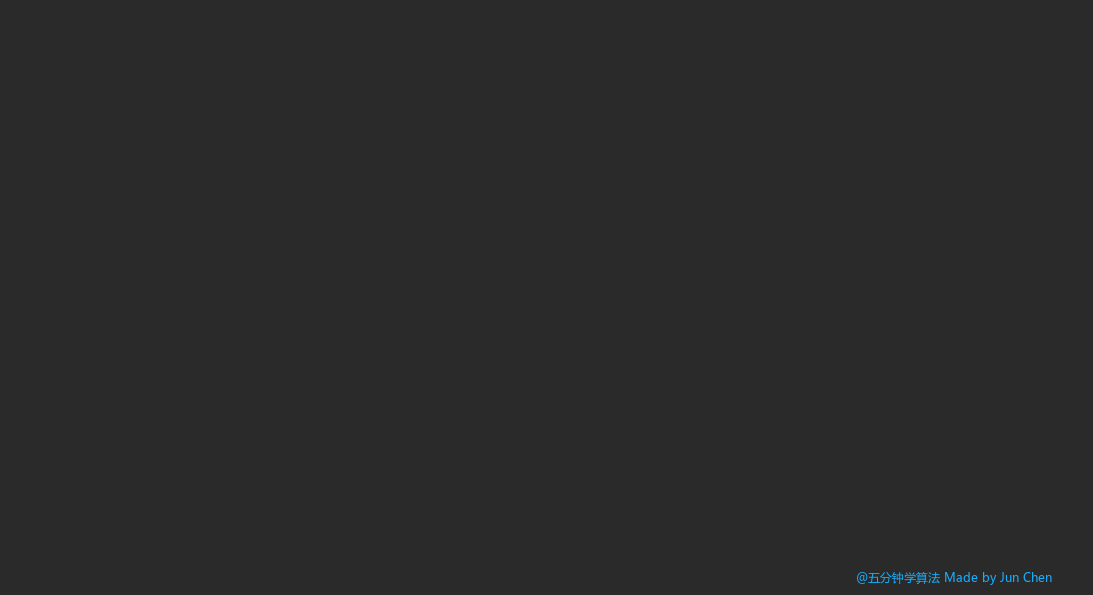


The use of a double-ended queue , in the array of storage elements position in the queue, and maintain strictly decreasing queues ,, is to say to maintain the team's first element is the ** ** Maximum, when traversing to a new element, if the queue If there is a smaller than the current element, it will be removed from the queue to ensure that the queue is decremented. When the difference between the position of the queue elements is greater than k, the leader element is removed.

Added: What is a double-ended queue (Dqueue)
Deque means "double ended queue", which is a double-ended queue with a data structure of the nature of queues and stacks. As its name implies, it is a queue that supports both insert and delete operations on both the front end and the back end.


* We scan the array from 0 to n-1, keep "promising" elements in the deque. The algorithm is amortized O(n) as each element is put and polled once.

* At each i, we keep "promising" elements, which are potentially max number in window [i-(k-1),i] or any subsequent window. This means

* If an element in the deque and it is out of i-(k-1), we discard them. We just need to poll from the head, as we are using a deque and elements are ordered as the sequence in the array

* Now only those elements within [i-(k-1),i] are in the deque. We then discard elements smaller than a[i] from the tail. This is because if a[x] <a[i] and x<i, then a[x] has no chance to be the "max" in [i-(k-1),i], or any other subsequent window: a[i] would always be a better candidate.

* As a result elements in the deque are ordered in both sequence in array and their value. At each step the head of the deque is the max element in [i-(k-1),i]



In [ ]:
def maxSlidingWindow(nums, k):

    # keep good candidates in deque, the first element in deque is the 
    # index of the largest window
    deque = collections.deque() 
    res = []
    for i,n in enumerate(nums):
        while deque and nums[deque[-1]] < n:
            deque.pop() # pop from the end the index of smaller element since they useless
        deque.append(i)
        if deque[0] == i-k:
            deque.popleft()
        if i >= k-1:
            res.append(nums[deque[0]])
    return res
